In [1]:
import numpy as np
import shem_spot_profile as ssp
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import copy

# Data and plots for fig. 2

This script generates the line plot in fig. 2, which is about the substrate effects.

 - Diffraction from bulk MoS2
 - No diffraction from monolayer MoS2
 - Diffraction from MoS2 on hBN

## Background signal

This is the reference scan off SiO2 substrate that is used for normalisation across datasets.

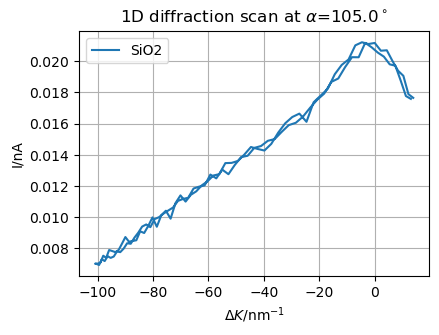

In [54]:
path_name='2023_09_defect_MoS2_5um_hbn_sub'

# I will use this scan for normalisation later in the script
file_ind=[7, 22, 6, 21, 5, 20, 4, 19, 2, 18, 8, 17, 9, 16, 10, 15, 11]
z_zero = 1.3e6
d = ssp.SpotProfile.import_ashem(file_ind, path_name, z_zero = z_zero)
_, _, b = d.line_plot_diffraction(105, scan=2, label='SiO2')
# But we don't actually use this here....

## Comparison figure

The bulk and monolayer datasets come from the same sample, a native defect density sample.

These datasets were taken concurrently, i.e. pixel on bulk, pixel on monolayer, so there is no need to normalise between them as background and detector sensitivity will not have changed between pixels.

## Substrate comparison

Key scans to demonstrate the point of the substrate

From this 2D scan pick alpha=67.5deg as the principle azimuth.

The raw data files is `Z002521.mat`. The example position is `[-3813500, 180100, -1000000]`.

An alternative is `Z002522.mat`. alpha=70deg, which we have a 2D scan at `scan004434.mat`. This is just slightly off the azimuth, but hopefully I can match some other scans to this one.

According to a random matlab script of Nick's scan 2167 is on the monolayer on SiO2.This sample was also taken at alpha=70deg.


Using alpha = 90.0deg.
Using alpha = 90.0deg.


/home/sam/repositories/mos2-defects/defect_mos2_data_alek_vivian/figure 2/shem_spot_profile.py:1080: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh1 = ax1.pcolormesh(sP.alpha*pi/180, getattr(sP, var), Z,


Text(0.5, 1.0, 'Substrate effect')

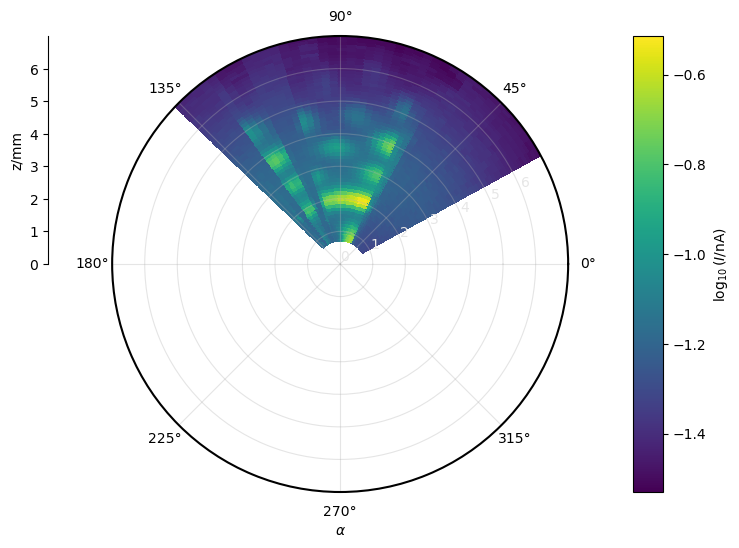

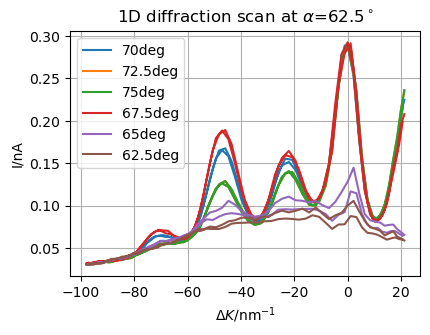

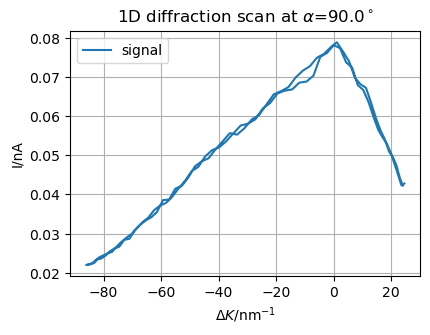

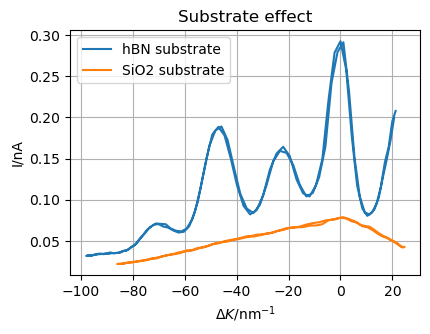

In [2]:
path_name = "2023_08_MoS2_5um_hbn_sub"
file_ind = np.arange(2506, 2549)
z_zero = 1.0e6
d = ssp.SpotProfile.import_ashem(file_ind, path_name, z_zero = z_zero, multi=False, alpha_zero=0)
d.shem_raw_plot()
_, a, _ = d.line_plot_diffraction(70, label="70deg")
d.line_plot_diffraction(72.5, ax=a, label="72.5deg")
d.line_plot_diffraction(72.5, ax=a, label="75deg")
d.line_plot_diffraction(67.5, ax=a, label="67.5deg")
d.line_plot_diffraction(65, ax=a, label="65deg")
d.line_plot_diffraction(62.5, ax=a, label="62.5deg")

d_nosub = ssp.SpotProfile.import_ashem([2167], path_name, z_zero=z_zero, multi=False)
d_nosub.line_plot_diffraction(5)


_, a2, df_hBNsub = d.line_plot_diffraction(67.5, label='hBN substrate')
_, _, df_nosub = d_nosub.line_plot_diffraction(5, ax=a2, label='SiO2 substrate')
a2.set_title('Substrate effect')

Match the signal level at the extreme end so a qualitative comparison can be made between the two data sets. The hBN substrate data set is along the principle azimuth while the one on SiO2 shows no symmetry - we cannot be sure which azimuth it was taken along. 

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_60288/2367955552.py:5: SyntaxWarning: invalid escape sequence '\D'
  ax.set_xlabel('$\Delta K/\mathrm{nm}^{-1}$')


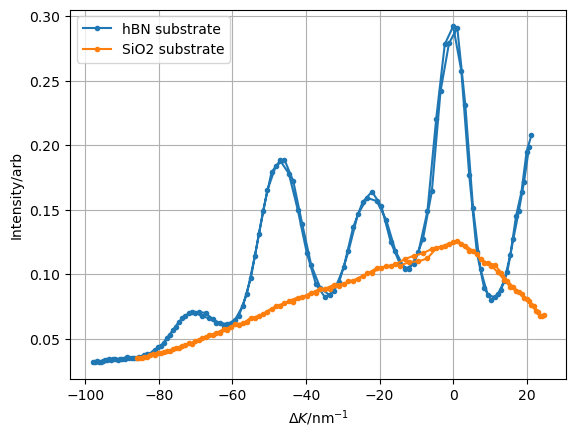

In [3]:
ax = plt.subplot()
ax.plot(df_hBNsub['DK'], df_hBNsub['signal'], '.-', label='hBN substrate')
ax.plot(df_nosub['DK'], df_nosub['signal']*1.6, '.-', label='SiO2 substrate')
ax.grid(True)
ax.set_xlabel('$\Delta K/\mathrm{nm}^{-1}$')
ax.set_ylabel('Intensity/arb')
ax.legend()

### Bulk monolayer comparison



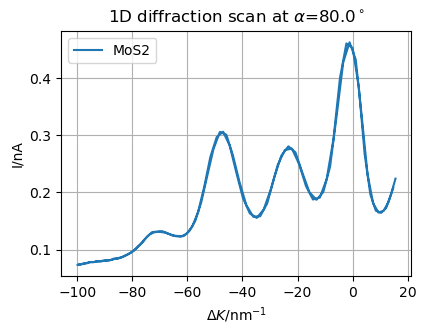

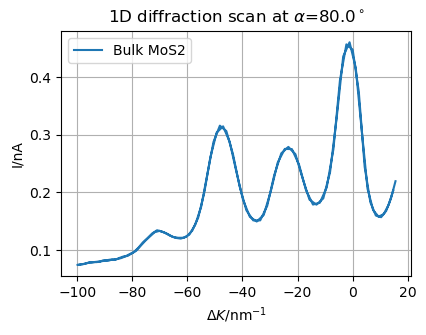

In [44]:
# Pristine data 
path_name='2023_12_defect1_repeat_5um_hbn_sub'
file_ind=[154,155,156,157,158]
 
z_zero = [1.2e6]
d = ssp.SpotProfile.import_ashem(file_ind, path_name, z_zero = z_zero)
_,_,df_mos2 = d.line_plot_diffraction(80, scan=0, label='MoS2')
#_,_,df_sio2 = d.line_plot_diffraction(80, scan=1, label='SiO2') # 
_,_,df_bulk = d.line_plot_diffraction(80, scan=2,label='Bulk MoS2')

In [1]:
#df_s1a_norm = pd.load('s1_background.npy')
#df_s3_norm = pd.read_pickle('df_s3_norm')

b = b.sort_values('DK')
df_bulk = df_bulk.sort_values('DK')
df_mos2 = df_mos2.sort_values('DK')
#df_sio2 = df_sio2.sort_values('DK')


monitor_res = [3840, 2160]

colours = ['#ff0033','#000000','#179cbd']

ms = 6
lw=2
lw_lines=2

dpi = 157.35

px = 2.35*(1/dpi)  # pixel in inches
f,a = plt.subplots(figsize=(667*px, 317*px))

plt.tight_layout()
plt.setp(a.spines.values(), linewidth=lw)
plt.tick_params(width=lw,length=6)
#a.grid(True, axis='y',lw=lw-1,alpha=0.5)

#Normalised to maximum value:
a.plot(df_bulk['DK'],df_bulk['signal'],'o-',label='bulk mos2',ms=ms,color=colours[2],lw=lw_lines,alpha=1)
a.plot(df_mos2['DK'],df_mos2['signal'],'s-',label='ml-mos2/hBN/sio2',ms=ms,color=colours[0],lw=lw_lines,alpha=1)
a.plot(df_nosub['DK'][0:-15:2], df_nosub['signal'][0:-15:2]*1.6+0.06,'^--',label='ml-mos2/sio2',ms=ms,color='black',lw=lw_lines)
a.plot(b['DK'][0:-1:2],b['signal'][0:-1:2]*8,'>',label='sio2',ms=ms,color='blue',lw=lw_lines)



#Standardised between leftmost and largest (-1,0 peak) values:
#a.plot(df_bulk['DK'],(df_bulk['signal']-df_bulk['signal'].iloc[0])/np.amax((df_bulk['signal']-df_bulk['signal'].iloc[0])),'o-',label='bulk mos2',ms=ms,color=colours[2],lw=lw_lines,alpha=1)
#a.plot(df_mos2['DK'],df_mos2['signal']-df_mos2['signal'].iloc[0])/np.amax((df_mos2['signal']-df_mos2['signal'].iloc[0])),'s-',label='ml-mos2/hBN/sio2',ms=ms,color=colours[0],lw=lw_lines,alpha=1)


#vec1 = df_nosub['signal'][0:-15:2]*1.6+0.06




#shows slight structure in the 'background' scan, likely tiny mos2 flakes present
# a.plot(df_sio2['DK'][0:-1:2],df_sio2['signal'][0:-1:2],'--d',label='sio2',ms=ms,color='black') 


#a.set_yticks(np.linspace(0,1,5))
#a.set_xticks([-100,-80,-60,-40,-20,0,20])
a.set_xticks([-100, -80,-60,-40,-20, 0, 20])
f.gca().axes.set_xticklabels([])
#f.gca().axes.set_yticklabels([])
a.legend()


#figpath = r'C://Users/Alek/OneDrive - University of Cambridge/PhD/SHeM/Defect density quantification in monolayer MoS2 using helium atom micro-diffraction/Data and Analysis'
#f.savefig(figpath+'/bulk_monolayer_sio2.svg',bbox_inches='tight')


NameError: name 'b' is not defined

In [118]:
df_s3_norm['signal'].iloc[-1]
#df_s3_norm['signal']

0.030647999999999988

In [152]:
vec1[:]

55    0.095227
54    0.095504
53    0.096106
52    0.098200
51    0.099101
50    0.099892
49    0.100591
48    0.102847
47    0.104779
46    0.106482
45    0.108026
44    0.110563
43    0.112753
42    0.114592
41    0.117610
40    0.119452
39    0.120557
38    0.123087
37    0.126482
36    0.129559
35    0.133460
34    0.135264
33    0.139506
32    0.142084
31    0.143186
30    0.145716
29    0.148931
28    0.152141
27    0.152889
26    0.154671
25    0.159048
24    0.161340
23    0.165247
22    0.166367
21    0.166863
20    0.169640
19    0.170054
18    0.172462
17    0.180164
16    0.181775
15    0.184937
14    0.183751
13    0.177912
12    0.175828
11    0.168628
10    0.166640
9     0.161686
8     0.155626
Name: signal, dtype: float64